/home/german/miniconda3/envs/myenv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


,Variable,Class,Count (%),Mean ± Std_dev,Median,Normal Data
0,Condition,Breast_Cancer,357 (62.74),NaN,NaN,NaN
1,Condition,Control,212 (37.26),NaN,NaN,NaN
2,Age,NaN,569 (100.0),39.22 ± 23.44,38.0,False


/home/german/Documents/German/github/statistics_class/class_Stastics.py:121: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.adata.uns[f"Description_{name}"] = df_res


,Variable_1,Variable_2,Correlation,P-value,N,FDR,Significative
Correlated Variables,,,,,,,
Age vs mean radius,mean radius,Age,-0.008603,0.908490,181,0.908490,False
Age vs mean texture,mean texture,Age,-0.134756,0.070505,181,0.141009,False


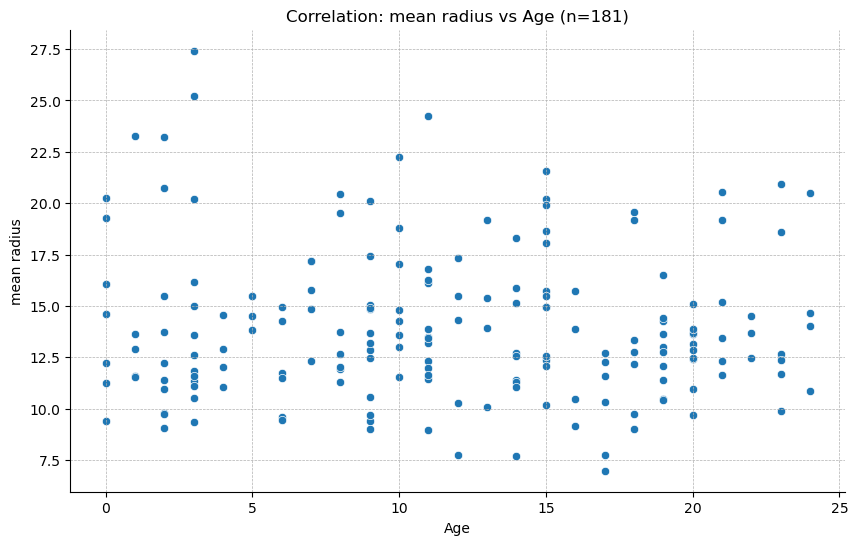

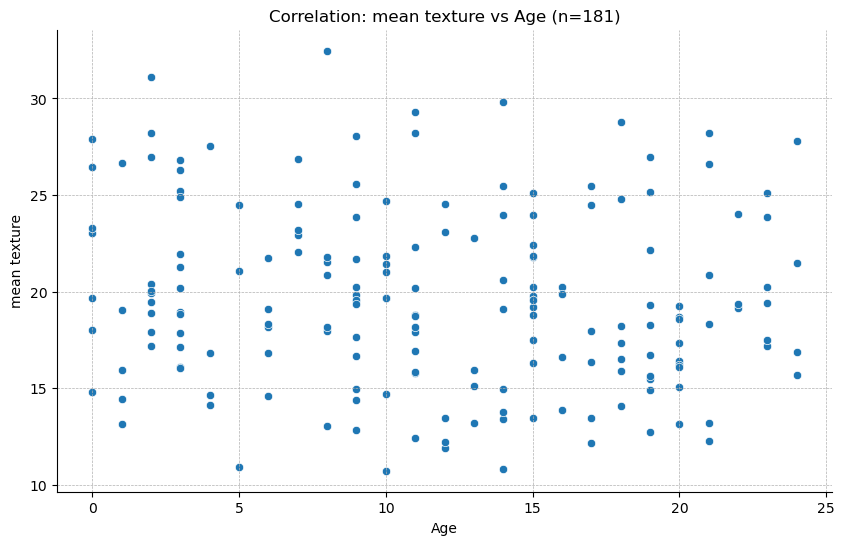

/home/german/Documents/German/github/statistics_class/class_Stastics.py:595: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  sns.stripplot(x=xlab, y="value", data=df_var, hue=condition, dodge=True, jitter=True, color='k', alpha=0.5, legend=False)


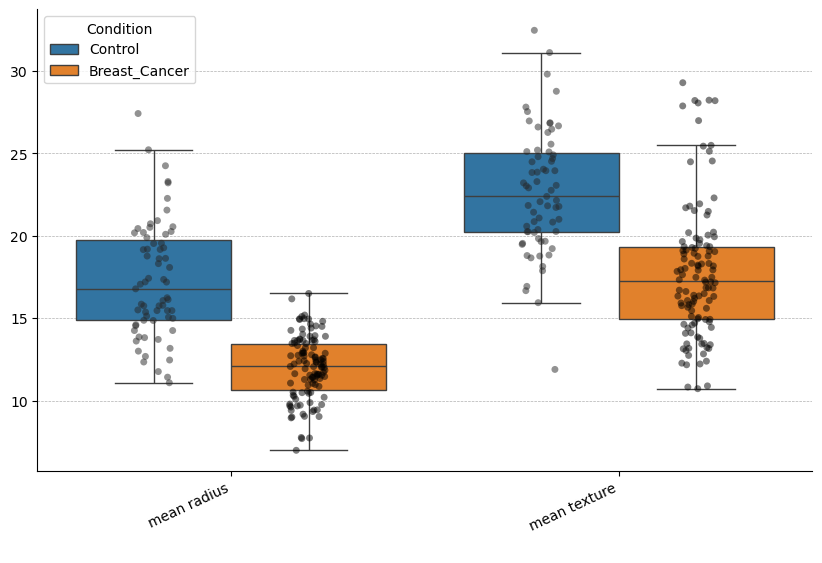

Comparison,Normal_Data,Test,P-value,Mean_Difference,Hodges_Lehmann_Estimator,FDR,Significant
Condition: mean radius,True,T-test,0.0,5.262098,NaN,1.271304e-27,True
Condition: mean texture,False,Mann-Whitney U,0.0,NaN,5.22,1.666171e-13,True


In [1]:
import pandas as pd
import numpy as np
from class_Stastics import Stastics  # Import the class
from sklearn.datasets import load_breast_cancer


# Load an example dataset

dataset = load_breast_cancer(return_X_y=True, as_frame=True)

data = dataset[0]

metadata = dataset[1].to_frame().rename(columns={"target":"Condition"})

metadata["Condition"] = [ "Breast_Cancer" if i==1 else "Control" for i in  metadata.Condition]

# Create an age metadata column randomly
metadata["Age"] = np.astype(np.random.random(size=metadata.shape[0]) * 80,int)

# Create an instance of the Stastics class
statist = Stastics(data, metadata)

# Show the automaticaly generated description
display(statist.adata.uns["Description_All"])

# Filter data based on metadata column (keep the young patients)
ages = statist.adata.obs.Age[ statist.adata.obs.Age < 25 ].tolist()
statist.filter(var_name="Age", subgroup=ages)


# Calculate and generate correlations
correlation_report = statist.do_correlations(
    variables_A=['Age'],
    Variables_B=statist.adata.var_names[:2],
    name="First_10_var"
)

display(correlation_report)


# Compare the condition in the first 10 variables and plot their correlation with Age 
for var in statist.adata.var_names[:2]:
    # Perform comparisons between conditions in each variable
    comparison_results = statist.comparisons_1_1(target=var, condition_name="Condition")

    # Plot correlation with age
    statist.plot_correlation(var1="Age", var2=var, show=True)

# Plot differences in a boxplot
statist.plot_differences(condition="Condition", vars=statist.adata.var_names[:2].tolist(), kind="Box", show=True)

display(comparison_results) # Show the report of the comparisons
